manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


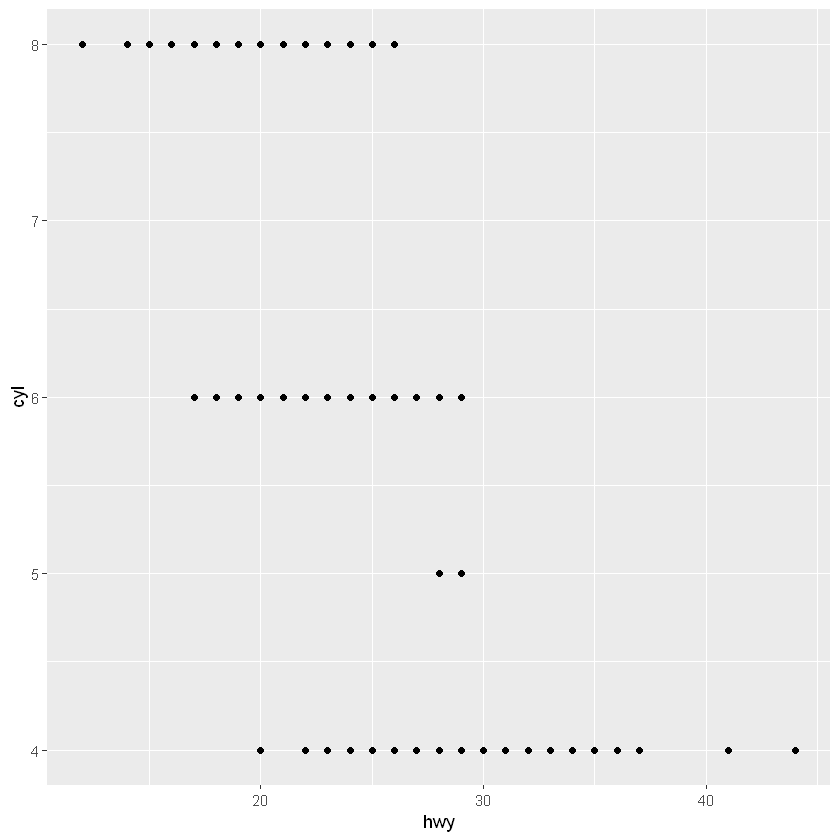

In [9]:
library(tidyverse)
head(mpg)
scatter1 <- ggplot(mpg) +
          geom_point(mapping = aes(x=hwy , y=cyl))
scatter1

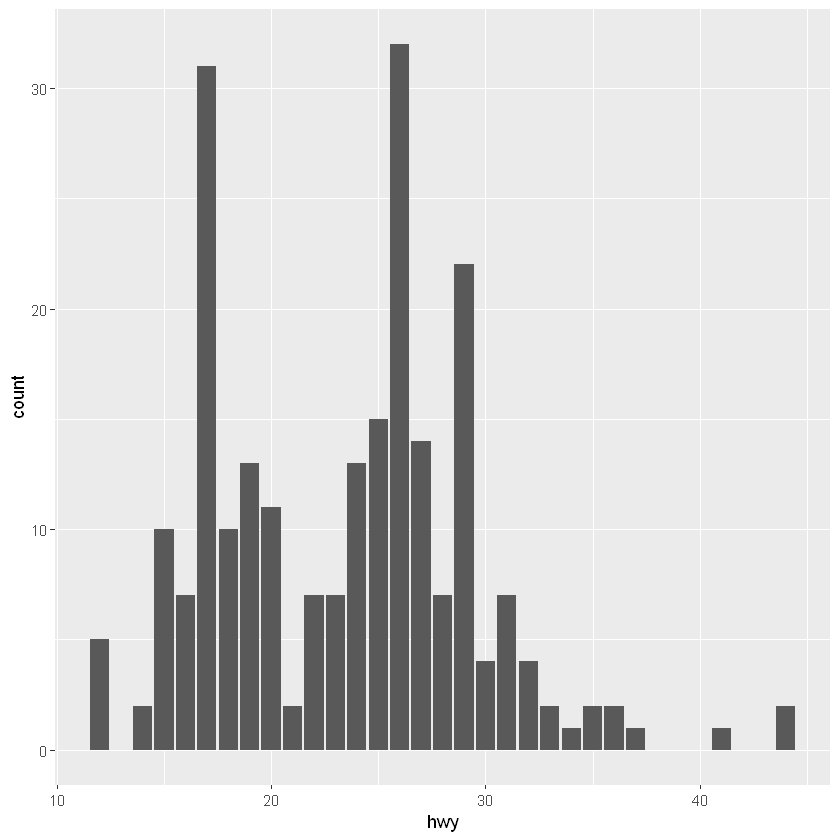

In [10]:
scatter2 <- ggplot(mpg) + geom_bar(mapping = aes(x=hwy))
scatter2

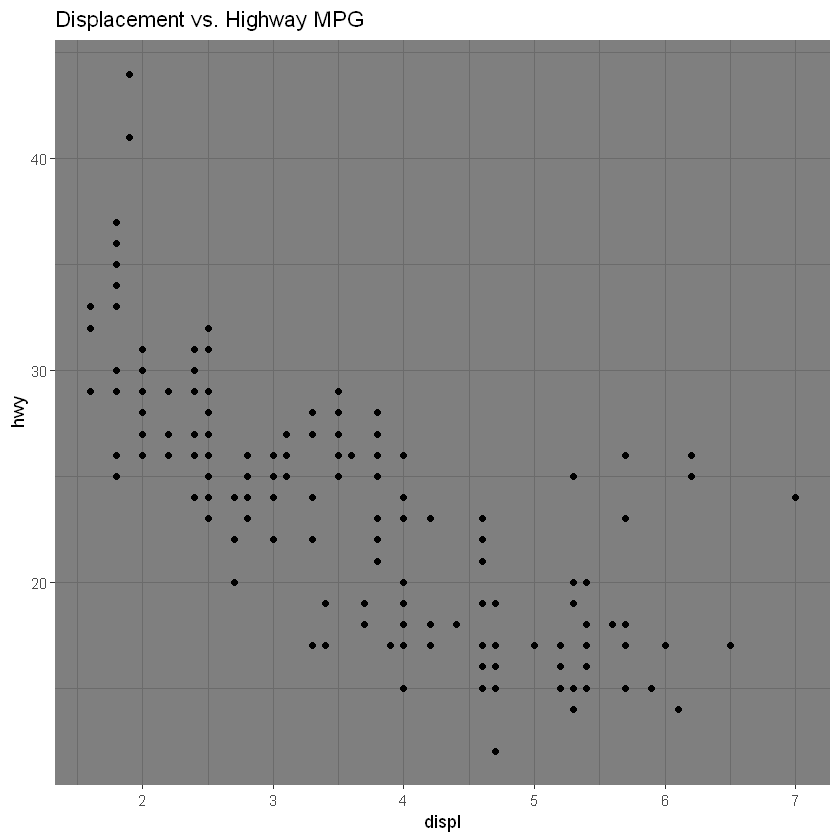

In [11]:
library(ggthemes)
p <- ggplot(data = mpg) + 
     geom_point(mapping = aes(x = displ, y = hwy)) + 
     theme_dark() +
     ggtitle("Displacement vs. Highway MPG")
p

In [12]:
str(mpg)
# do not use view(mpg) as it generates a table

tibble [234 x 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [14]:
library(nycflights13)
houston_flights <- flights %>%
                    filter(dest == "IAH" | dest == "HOU")
str(houston_flights)

tibble [9,313 x 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:9313] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:9313] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:9313] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:9313] 517 533 623 728 739 908 1028 1044 1114 1205 ...
 $ sched_dep_time: int [1:9313] 515 529 627 732 739 908 1026 1045 900 1200 ...
 $ dep_delay     : num [1:9313] 2 4 -4 -4 0 0 2 -1 134 5 ...
 $ arr_time      : int [1:9313] 830 850 933 1041 1104 1228 1350 1352 1447 1503 ...
 $ sched_arr_time: int [1:9313] 819 830 932 1038 1038 1219 1339 1351 1222 1505 ...
 $ arr_delay     : num [1:9313] 11 20 1 3 26 9 11 1 145 -2 ...
 $ carrier       : chr [1:9313] "UA" "UA" "UA" "UA" ...
 $ flight        : int [1:9313] 1545 1714 496 473 1479 1220 1004 455 1086 1461 ...
 $ tailnum       : chr [1:9313] "N14228" "N24211" "N459UA" "N488UA" ...
 $ origin        : chr [1:9313] "EWR" "LGA" "LGA" "LGA" ...
 $ dest          : chr [1:9313] "I

In [15]:
nrow(houston_flights)

[1] 9313

In [16]:
na_top <- flights %>% arrange(desc(is.na(dep_time)))
head(na_top)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00


In [17]:
# using dplyr
flights_v2 <- flights %>% mutate(mph = distance / (air_time*60))
head(flights_v2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,mph
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,0.10279001
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,0.10396476
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,0.11343750
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,0.14353370
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,0.10948276
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,0.07988889


In [18]:
flights %>% group_by(carrier) %>% summarise(count = n())

carrier,count
<chr>,<int>
9E,18460
AA,32729
AS,714
B6,54635
DL,48110
EV,54173
F9,685
FL,3260
HA,342


In [19]:
mean_delay <- flights %>% group_by(carrier) %>% summarise(mean_delay = mean(dep_delay))
mean_delay

carrier,mean_delay
<chr>,<dbl>
9E,NA
AA,NA
AS,NA
B6,NA
DL,NA
EV,NA
F9,NA
FL,NA
HA,4.900585


In [20]:
mean_delay <- flights %>% group_by(carrier) %>% summarise(mean_delay = mean(dep_delay, na.rm = TRUE))
mean_delay
# removes all empty values > na.rm = true

carrier,mean_delay
<chr>,<dbl>
9E,16.725769
AA,8.586016
AS,5.804775
B6,13.022522
DL,9.264505
EV,19.955390
F9,20.215543
FL,18.726075
HA,4.900585


`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



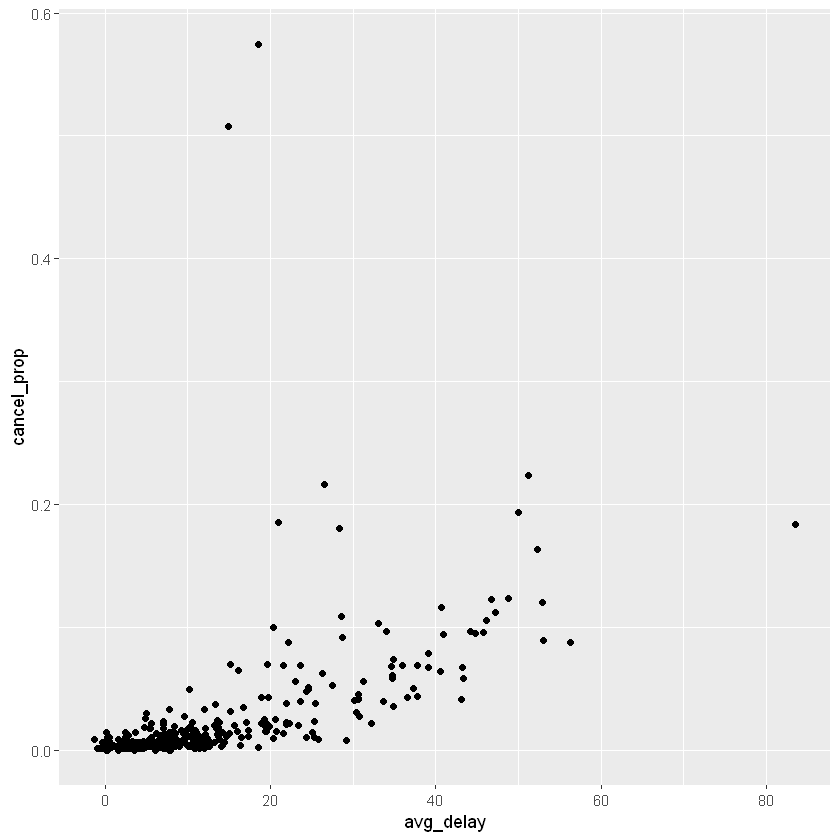

In [21]:
library(ggplot2)
daily_cancels <- flights %>%
                  group_by(year, month, day) %>%
                  summarise(cancels = sum(is.na(dep_delay)),
                            cancel_prop = sum(is.na(dep_delay)) / n(),
                            avg_delay = mean(dep_delay, na.rm = TRUE))
ggplot(daily_cancels) + geom_point(mapping = aes(x=avg_delay, y = cancel_prop))

# order by >> PROC SORT


In [22]:
# SQL functions  like the PROC SQL
library(sqldf)
inner_join_df <- sqldf(
  'select 
    a.*
   ,b.manufacturer 
   from flights a inner join planes b on a.tailnum = b.tailnum'
  )
str(inner_join_df)

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



'data.frame':	284170 obs. of  20 variables:
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 849 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 851 ...
 $ arr_delay     : num  11 20 33 -18 -25 12 19 -14 -8 -2 ...
 $ carrier       : chr  "UA" "UA" "AA" "B6" ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 49 ...
 $ tailnum       : chr  "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr  "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr  "IAH" "IAH" "MIA" "BQN" ...
 $ air_time      : num  227 227 160 183 116 150 158 53 140 149 ...
 $ distance      : num  1400 1416 1089

In [23]:
nba <- read.csv("C:/Users/Alex/Documents/Teaching/Statistical Computing/Spring 2021 1H/rmd/Lecture 4/nba_combine.csv")
str(nba)
nba <- read.table("C:/Users/Alex/Documents/Teaching/Statistical Computing/Spring 2021 1H/rmd/Lecture 4/nba_combine.csv", header = TRUE, sep = ",")
str(nba)

write.csv(mpg, "C:/Users/Alex/Documents/Teaching/Statistical Computing/Spring 2021 1H/rmd/Lecture 4/mpg.csv")

# haven package is for reading SAS datasets
library(haven)
nba <- read_sas("C:/Users/Alex/Documents/Teaching/Statistical Computing/Spring 2021 1H/rmd/Lecture 4/nba.sas7bdat")
str(nba)

Warning message in file(file, "rt"):
"cannot open file 'C:/Users/Alex/Documents/Teaching/Statistical Computing/Spring 2021 1H/rmd/Lecture 4/nba_combine.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# set current directort 
setwd("C:/Users/Alex/Documents/Teaching/Statistical Computing/Spring 2021 1H/rmd/")


In [28]:
#get current work directory
getwd()

[1] "C:/Users/kisho/Documents/Classes/STAT COMP 6043"

In [ ]:
# write R dataframes to excel >> use the library openxlsx
library(openxlsx)
write.xlsx(mpg, "mpg.xlsx")

In [ ]:
# functions
# function header specifies the arguments
function_name <- function(arg1, arg2,..., argN) {
   
}

## call the R function as follows
function_name(arg1, arg2,...,argN)

In [24]:
mean_sd <- function(x, cond = TRUE) { 
  
  if (cond) { 
    
    mean <- mean(x, na.rm = TRUE)
    sd <- sd(x, na.rm = TRUE)
    
  }
  
  else {
    
    mean <- mean(x)
    sd <- sd(x)
    
  }
  
  retvals <- list(mu = mean, sigma = sd)
  return(retvals)
}


In [25]:
temp_vec <- c(1, 4, 5, NA)
mean_sd(temp_vec, FALSE)

$mu
[1] NA

$sigma
[1] NA

In [34]:
mean_sd(temp_vec, TRUE)

$mu
[1] 3.333333

$sigma
[1] 2.081666

In [36]:
# if else function in R
ints1_10 <- 1:10
ints1_10
even_vec <- ifelse(ints1_10 %% 2 == 0, "Even", "Not Even")
even_vec

[1]  1  2  3  4  5  6  7  8  9 10

[1] "Not Even" "Even"     "Not Even" "Even"     "Not Even" "Even"    
 [7] "Not Even" "Even"     "Not Even" "Even"

In [45]:
#  randomly generated values from the uniform distribution > using the runif() betweeen 0 and 1
x <- runif(3)
x

[1] 0.03535117 0.76214717 0.93439339

In [46]:
# rep()  - this base R function replicates the value passed as the first argument as many times as
# specified via the second argument.
y1 <- rep(x*2, length(x))
y1

[1] 0.07070234 1.52429434 1.86878678 0.07070234 1.52429434 1.86878678 0.07070234
[8] 1.52429434 1.86878678

In [47]:

y1 <- rep(x*2, 1)
y1

[1] 0.07070234 1.52429434 1.86878678

[1] 1

[1] 0.0025095873 0.0068792601 0.0035689969 0.0077057805 0.0082071253
 [6] 0.0003975555 0.0046085898 0.0077878253 0.0048121783 0.0039847153

[1] 0.9999969 0.9999763 0.9999936 0.9999703 0.9999663 0.9999999 0.9999894
 [8] 0.9999697 0.9999884 0.9999921

[1] 0.0025095847 0.0068792058 0.0035689893 0.0077057043 0.0082070332
 [6] 0.0003975554 0.0046085735 0.0077877466 0.0048121597 0.0039847047

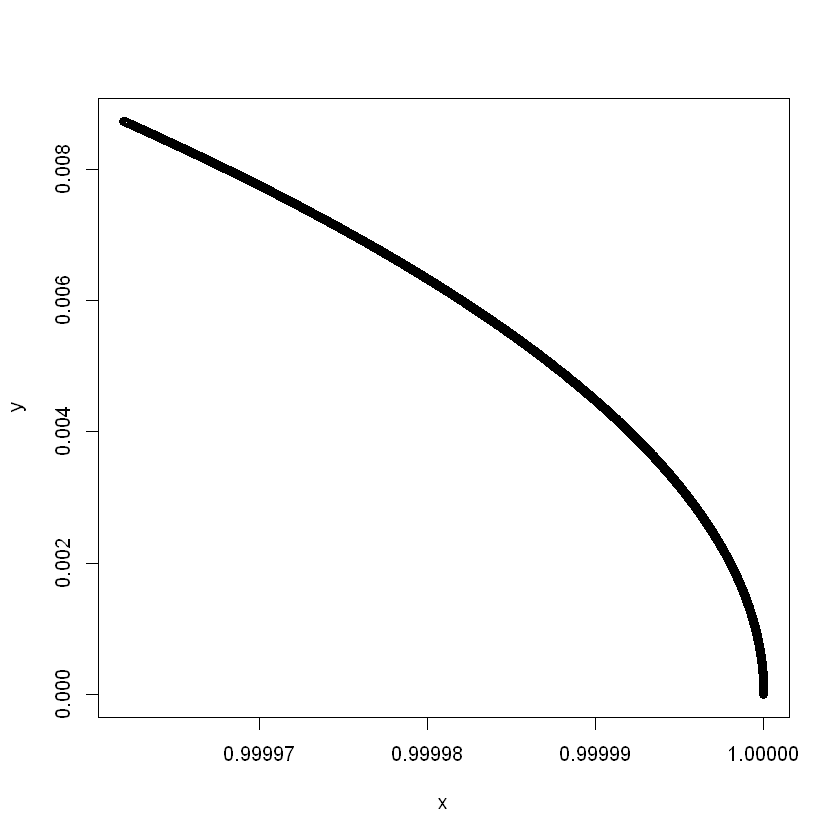

In [53]:

# correlration study

set.seed(123)
r <- 1
r
theta <- runif(10000)*pi/360
theta[1:10]

x <- r*cos(theta)
x[1:10]
y <- r*sin(theta)
y[1:10]
plot(x,y)

In [54]:
# correlation btw variables _ pearson's rho
cor.test(x,y)



	Pearson's product-moment correlation

data:  x and y
t = -384.52, df = 9998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9690321 -0.9665484
sample estimates:
       cor 
-0.9678138 


In [28]:
# correlation using gapminder
library(tidyverse)
library(gapminder)


# cor function requires only numeric values
# country and continent are non-numeric variables

In [29]:
cor(gapminder)

ERROR: Error in cor(gapminder): 'x' must be numeric


In [8]:
summary(gapminder)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [32]:
library(tidyverse)
# so we will select only numeric variables
cor(gapminder %>% select(year, lifeExp, pop, gdpPercap))

# the above code is same as

# gapminder %>% select(year, lifeExp, pop, gdpPercap) %>% cor()

,year,lifeExp,pop,gdpPercap
year,1.00000000,0.43561122,0.08230808,0.22731807
lifeExp,0.43561122,1.00000000,0.06495537,0.58370622
pop,0.08230808,0.06495537,1.00000000,-0.02559958
gdpPercap,0.22731807,0.58370622,-0.02559958,1.00000000


In [42]:
library(ggplot2)
library(GGally)


ERROR: Error in library(needs): there is no package called 'needs'


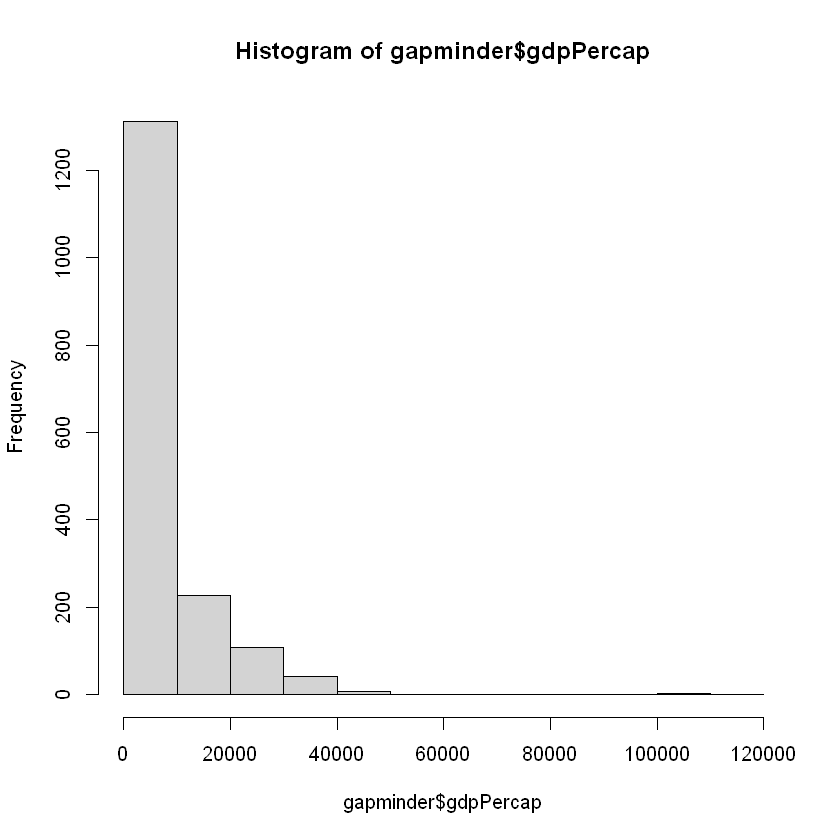

In [34]:
hist(gapminder$gdpPercap)

In [ ]:
# cor() function does not produce test statistics or p-values for each pairwise correlation coefficient estimate

# But PROC CORR in SAS gives the p values

In [ ]:
 # histogram for corr co efficients..corrgrams

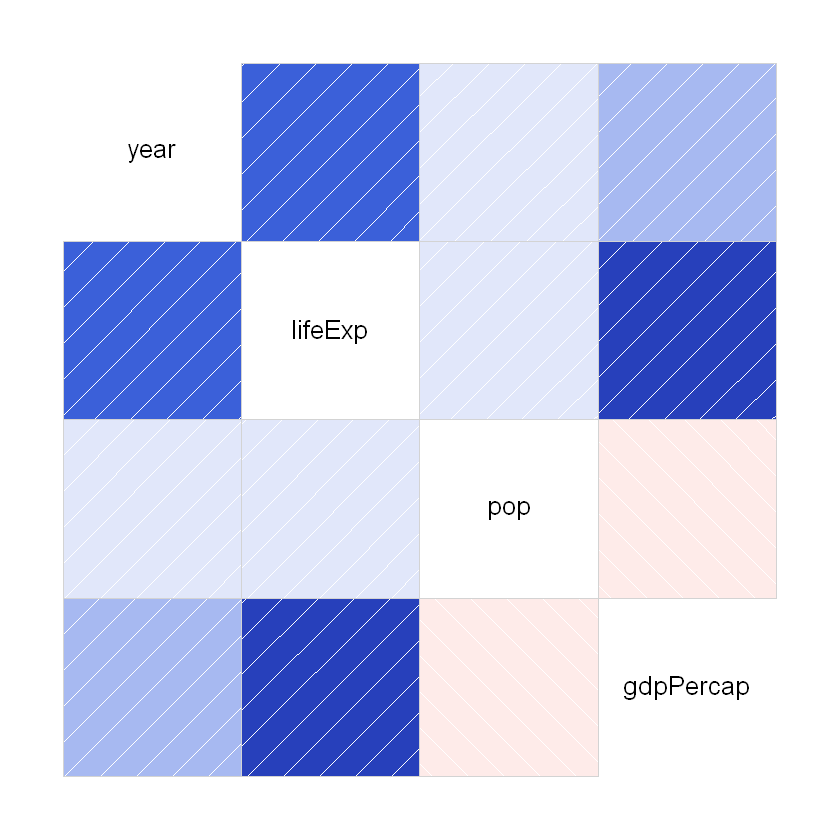

In [35]:
library(corrgram)
gapminder %>% 
select(year, lifeExp, pop, gdpPercap) %>%
corrgram()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



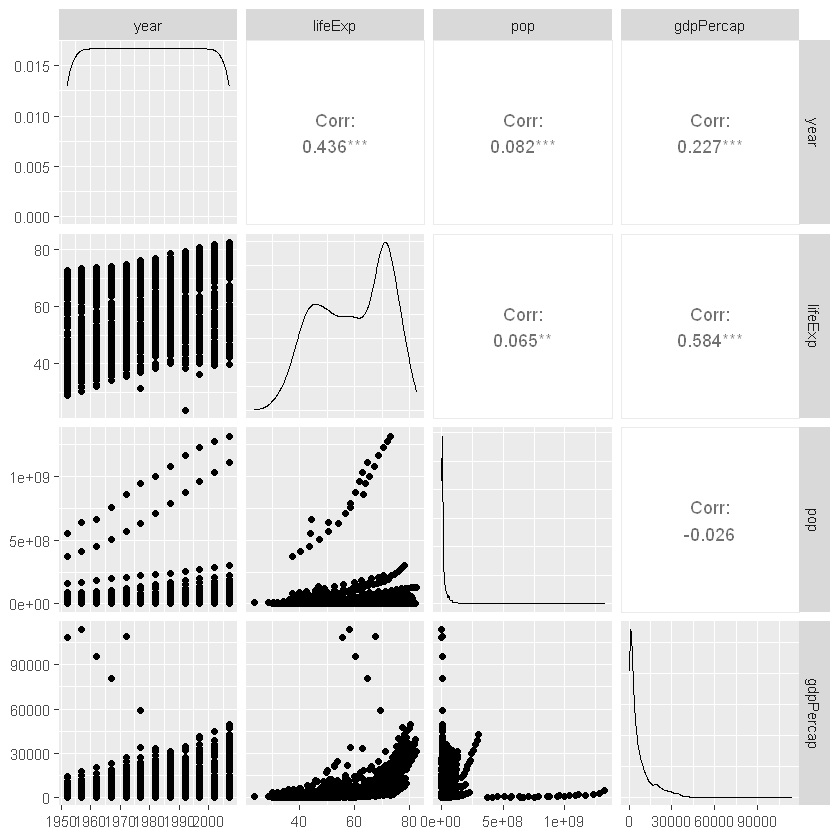

In [36]:
# using ggplot2 with ggally package we can have this
library(ggplot2)
library(GGally)
ggpairs(gapminder %>% select(year, lifeExp, pop, gdpPercap))

In [67]:
# linear regression  > uses lm fucntion > lm - linear model
summary(gapminder)
summary(mpg)



        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

In [68]:
model1 <- lm(lifeExp ~ gdpPercap, gapminder)
summary(model1)


Call:
lm(formula = lifeExp ~ gdpPercap, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.754  -7.758   2.176   8.225  18.426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.396e+01  3.150e-01  171.29   <2e-16 ***
gdpPercap   7.649e-04  2.579e-05   29.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.49 on 1702 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.3403 
F-statistic: 879.6 on 1 and 1702 DF,  p-value: < 2.2e-16


In [69]:
# so for 100$ in gdp increae ,,how many days of life exp increase?
100*7.649e-04*365 

[1] 27.91885

Regression Diagnostics in R

Four assumptions of linear regression that we covered in Lecture 3:

The error terms are independent of each other (i.e. the error term of one observation is independent of another observation)

The errors are normally distributed

The errors are distributed with a mean of zero

The errors are distributed with a constant variance (i.e. the assumption of homoscedasticity)

In [70]:
summary(model1)


Call:
lm(formula = lifeExp ~ gdpPercap, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.754  -7.758   2.176   8.225  18.426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.396e+01  3.150e-01  171.29   <2e-16 ***
gdpPercap   7.649e-04  2.579e-05   29.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.49 on 1702 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.3403 
F-statistic: 879.6 on 1 and 1702 DF,  p-value: < 2.2e-16


In [71]:
res_hat <- model1$residuals
str(res_hat)

 Named num [1:1704] -25.8 -24.3 -22.6 -20.6 -18.4 ...
 - attr(*, "names")= chr [1:1704] "1" "2" "3" "4" ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



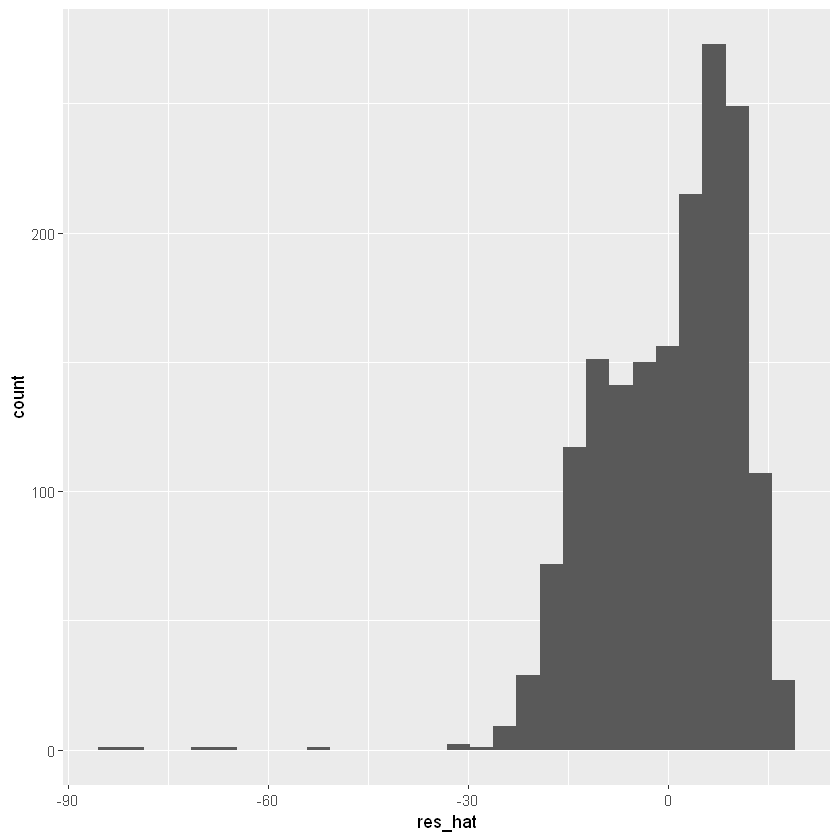

In [72]:
# making an assumption of normality
# here res_hat is a vector..for ggplot which takes dataframe inputs, note that we converted res_hat vector into data frame

res_hist <- ggplot(data.frame(res_hat), aes(res_hat)) + geom_histogram()
res_hist

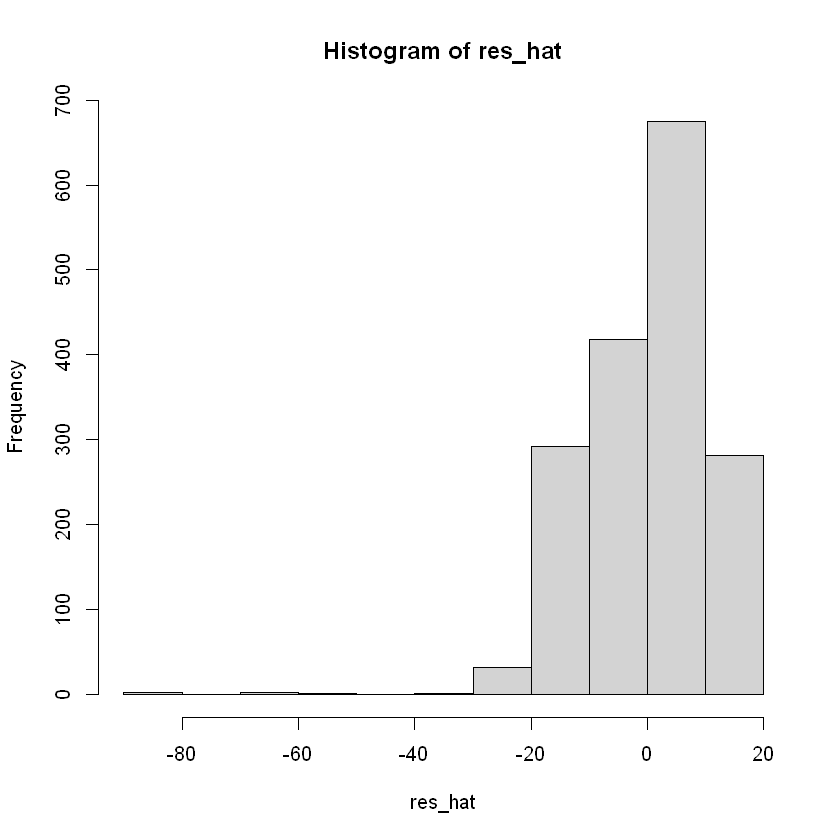

In [73]:
hist(res_hat)

In [74]:
# so the residuals doesnot appear to be normally distributed
# Shapiro-Wilk Normality Test
#  null hypothesis of the Shapiro-Wilk Normality Test 
#         > the random variable under consideration is normally disributed...i.e p value<0.05
shapiro.test(res_hat)


	Shapiro-Wilk normality test

data:  res_hat
W = 0.92018, p-value < 2.2e-16


In [ ]:
# since p<0.05 our hypothesis is rejected.
# this residuals are not normally distributed


In [75]:
# Assumption of a Zero Mean 
# the assumption/hypothesis >  the mean of the residuals is equal to zero
t.test(res_hat)


	One Sample t-test

data:  res_hat
t = -2.9077e-15, df = 1703, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4983387  0.4983387
sample estimates:
    mean of x 
-7.387713e-16 


In [76]:
# p value is 1. Nullhyp rejected. mean value is not zero.


# # test if the mean of the residuals is statistically significantly different than 100
t.test(res_hat,mu=100)


	One Sample t-test

data:  res_hat
t = -393.58, df = 1703, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 100
95 percent confidence interval:
 -0.4983387  0.4983387
sample estimates:
    mean of x 
-7.387713e-16 


In [77]:
# yes mean is statistically significantly different than 100.
# i.e mean~= 100

# Assumption of Constant Variance
summary(model1)


Call:
lm(formula = lifeExp ~ gdpPercap, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.754  -7.758   2.176   8.225  18.426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.396e+01  3.150e-01  171.29   <2e-16 ***
gdpPercap   7.649e-04  2.579e-05   29.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.49 on 1702 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.3403 
F-statistic: 879.6 on 1 and 1702 DF,  p-value: < 2.2e-16


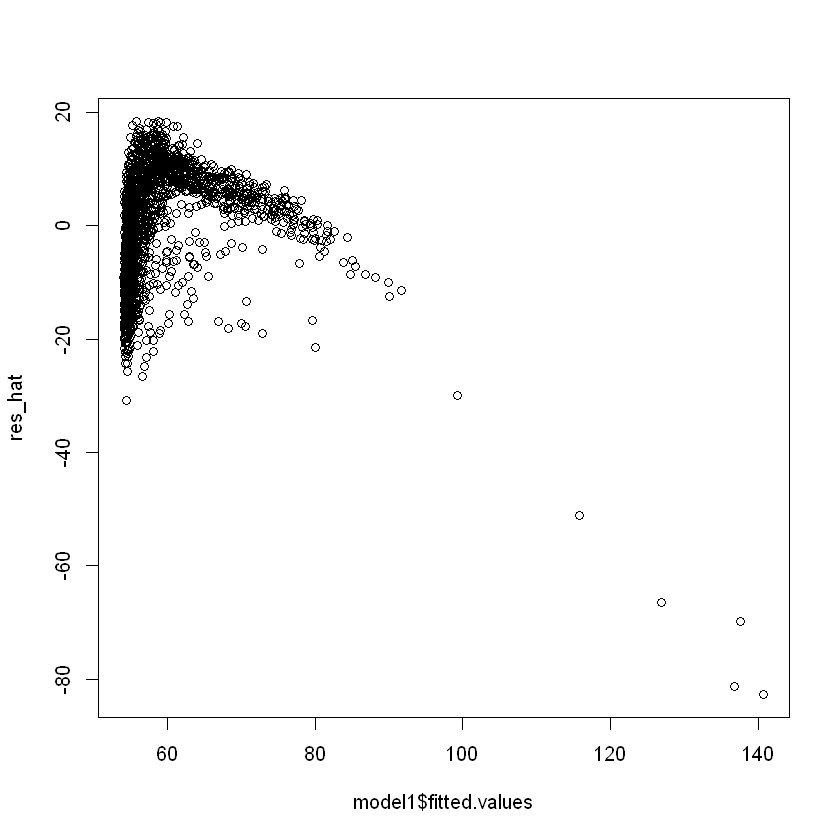

In [78]:
# Assumption of Constant Variance
#  homoscedasticity test. So we use Breusch-Pagan test or the White test

plot(model1$fitted.values, res_hat)

In [ ]:
# fitted vs residual > assumption of constant variance is not met

We conclude the following:

The assumption of normality is not met
The assumption of mean zero appears to be met
The assumption of constant variance is not met

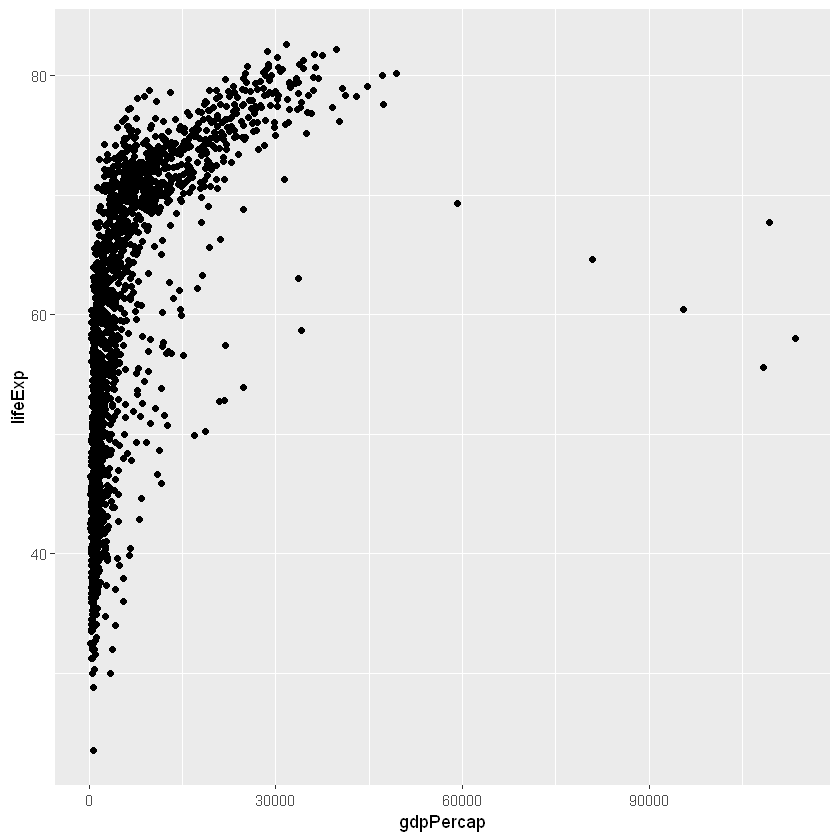

In [80]:
# we will explore alternative transformations of either the response variable or the predictor variable

# this was our previous model.
# just plotting the graph
ggplot(gapminder) + geom_point(aes(x = gdpPercap, y = lifeExp))

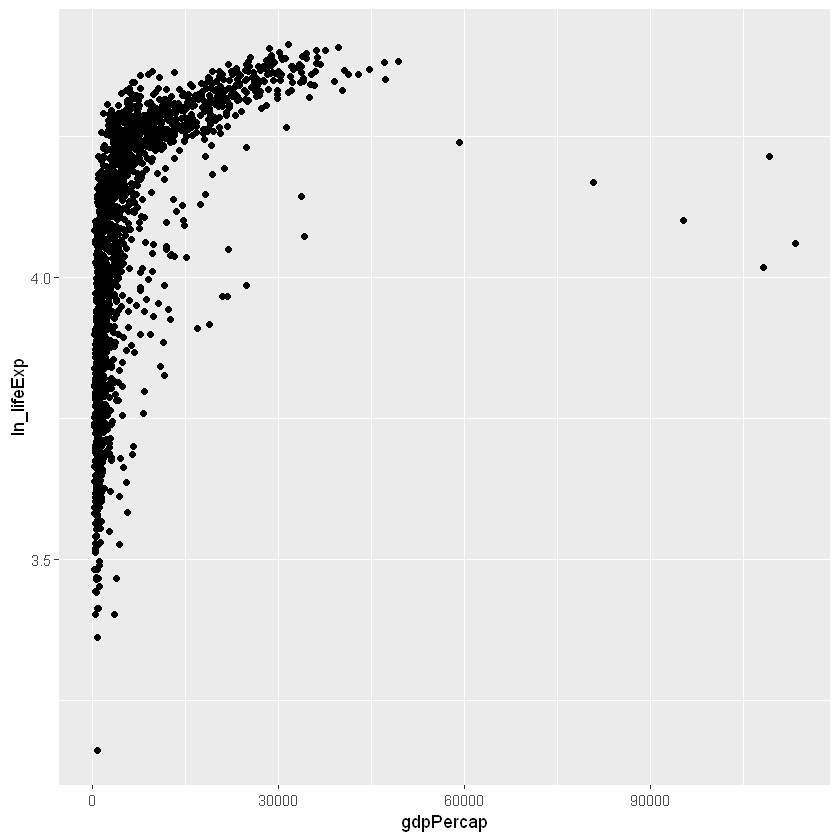

In [81]:
# let us change or modify variables
gapminder <- gapminder %>% mutate(ln_lifeExp = log(lifeExp),
                                  ln_gdpPercap = log(gdpPercap))

# inspect the relationship with a scatter plot
ggplot(gapminder) + geom_point(aes(x=gdpPercap, y=ln_lifeExp))

In [82]:
# no much difference..
# lets model it and check
model2 <- lm(ln_lifeExp ~ gdpPercap, gapminder)
summary(model2)


Call:
lm(formula = ln_lifeExp ~ gdpPercap, data = gapminder)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37201 -0.12789  0.04738  0.14988  0.30925 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.967e+00  5.835e-03  679.85   <2e-16 ***
gdpPercap   1.292e-05  4.777e-07   27.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1943 on 1702 degrees of freedom
Multiple R-squared:  0.3005,	Adjusted R-squared:  0.3001 
F-statistic: 731.1 on 1 and 1702 DF,  p-value: < 2.2e-16


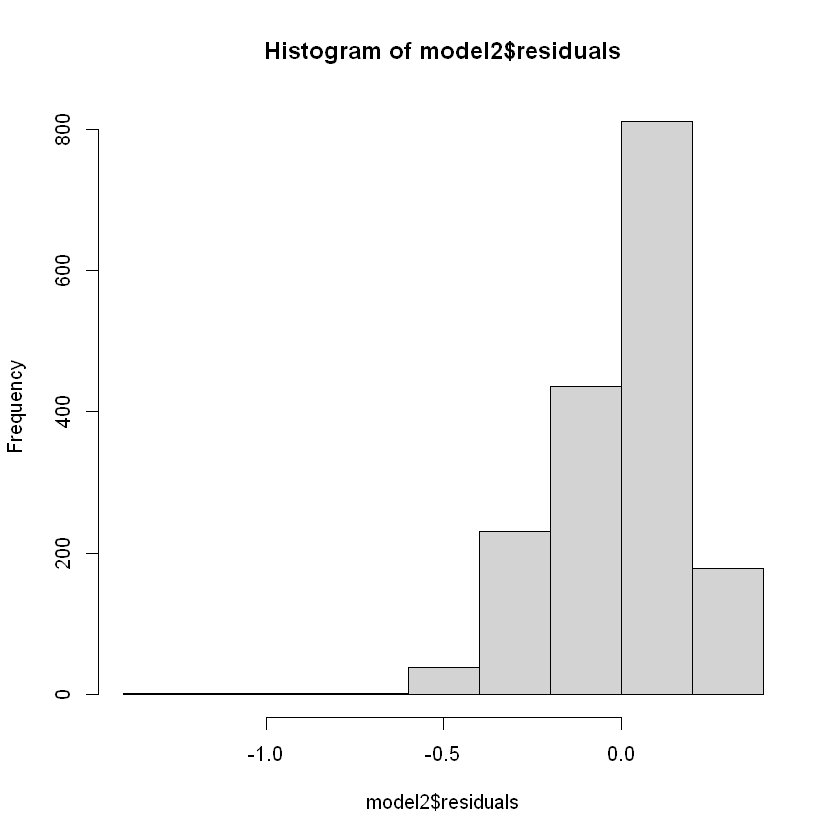

In [83]:
hist(model2$residuals)

# note that by visual inspection...mean is not at zero


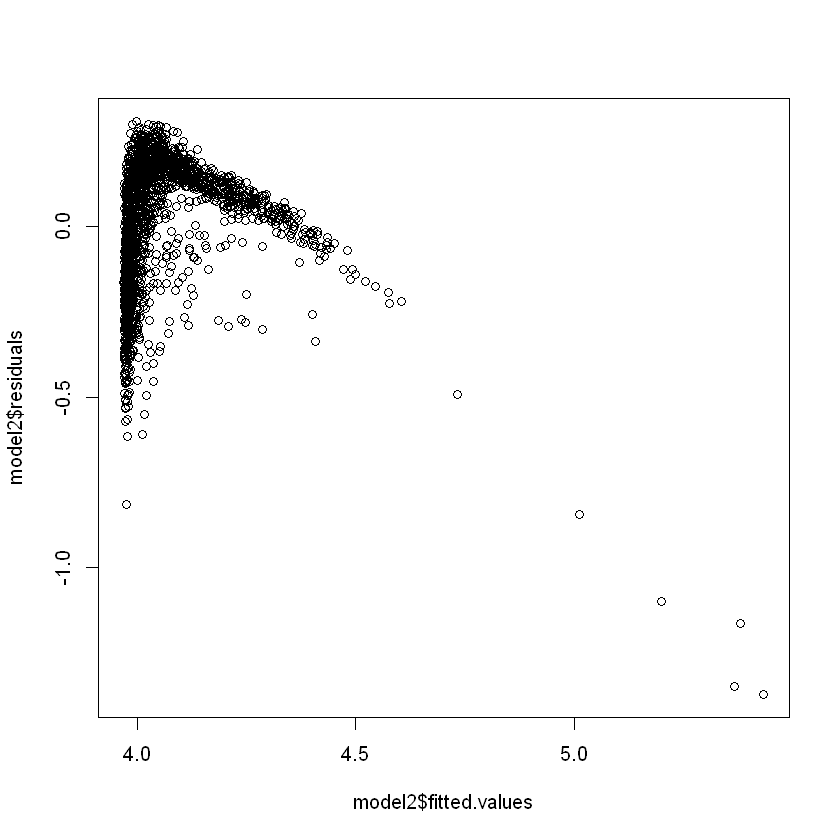

In [84]:
plot(model2$fitted.values, model2$residuals)

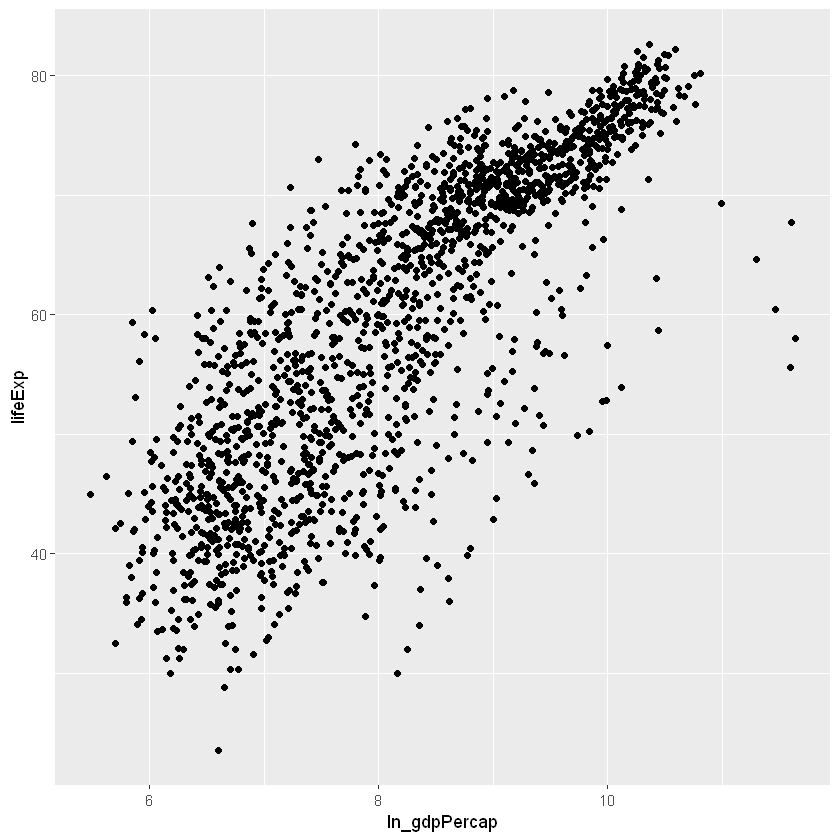

In [85]:
ggplot(gapminder) + geom_point(aes(x=ln_gdpPercap, y=lifeExp))

In [86]:
model3 <- lm(lifeExp ~ ln_gdpPercap, gapminder)
summary(model3)


Call:
lm(formula = lifeExp ~ ln_gdpPercap, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.778  -4.204   1.212   4.658  19.285 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.1009     1.2277  -7.413 1.93e-13 ***
ln_gdpPercap   8.4051     0.1488  56.500  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.62 on 1702 degrees of freedom
Multiple R-squared:  0.6522,	Adjusted R-squared:  0.652 
F-statistic:  3192 on 1 and 1702 DF,  p-value: < 2.2e-16


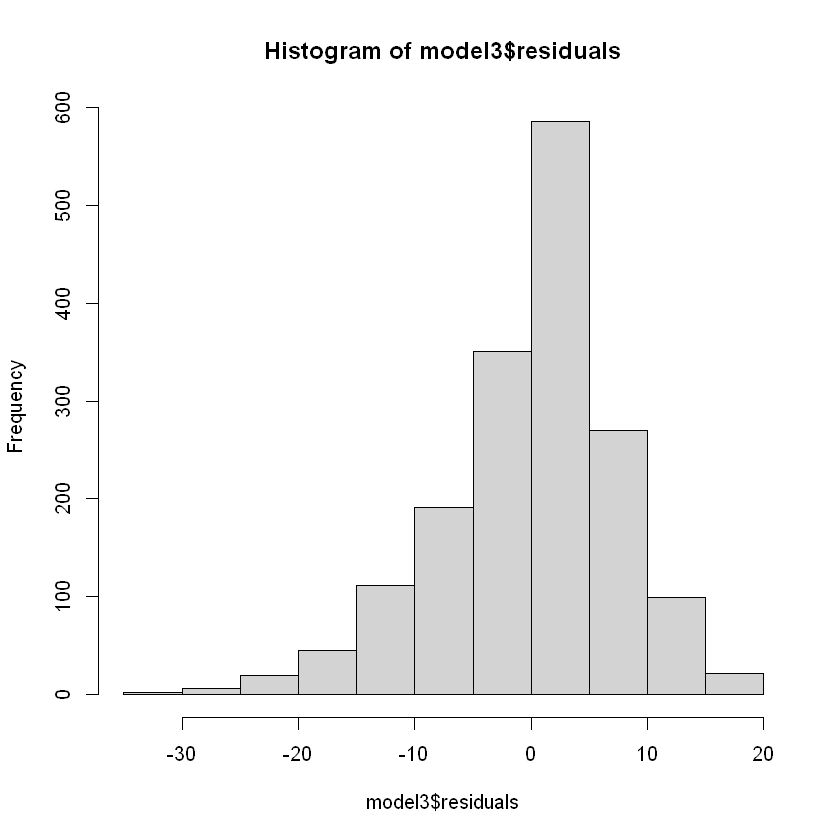

In [87]:
hist(model3$residuals)

In [88]:
#  mean seems to be at zero 
# we will perform other tests
# test for normality
shapiro.test(model3$residuals)


	Shapiro-Wilk normality test

data:  model3$residuals
W = 0.97003, p-value < 2.2e-16



Call:
lm(formula = ln_lifeExp ~ ln_gdpPercap, data = gapminder)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67059 -0.06453  0.01978  0.09086  0.36156 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.864177   0.023283  123.02   <2e-16 ***
ln_gdpPercap 0.146549   0.002821   51.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1445 on 1702 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.613 
F-statistic:  2698 on 1 and 1702 DF,  p-value: < 2.2e-16


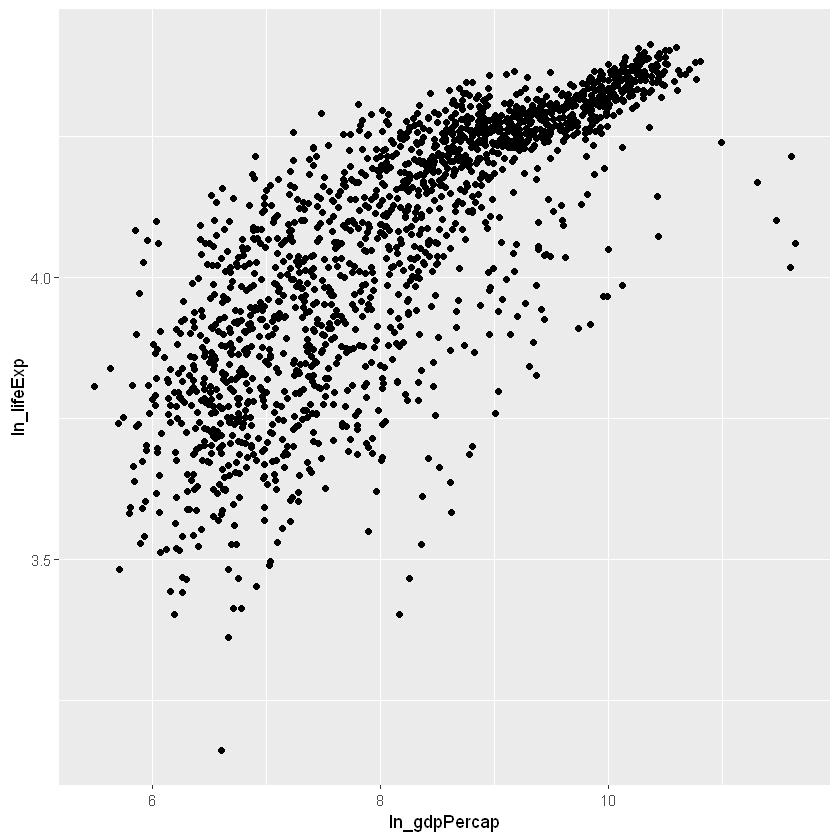

In [91]:
# p value <0.05
# since p<0.05 our hypothesis is rejected.
# this residuals are not normally distributed

# but the above histtogram says its pretty normal



#model 4
ggplot(gapminder) + geom_point(aes(x=ln_gdpPercap, y=ln_lifeExp))

model4 <- lm(ln_lifeExp ~ ln_gdpPercap, gapminder)
summary(model4)

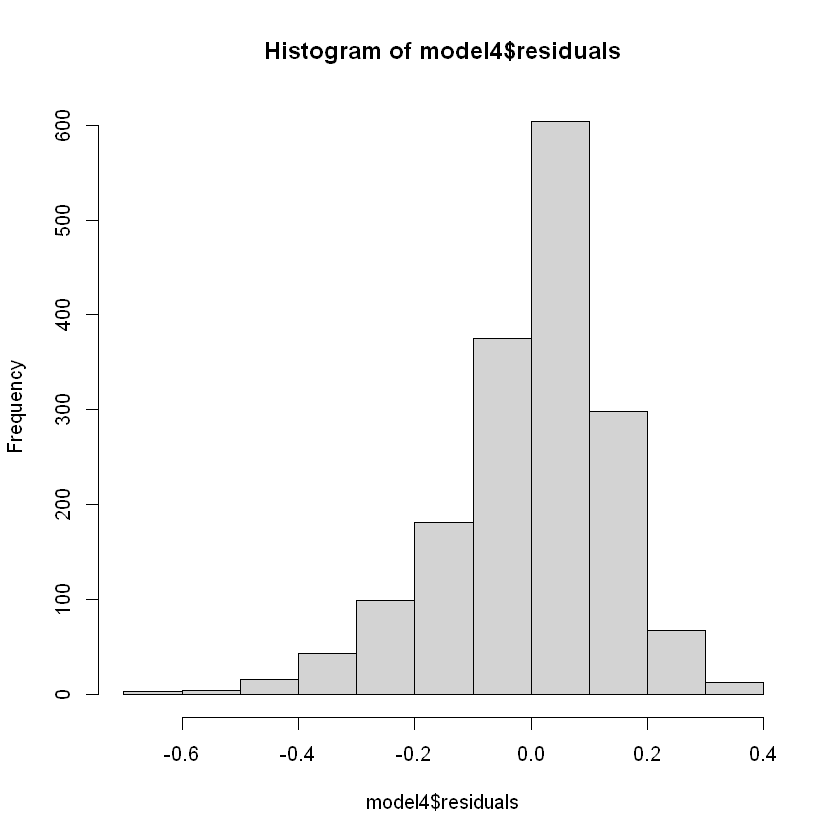

In [92]:
hist(model4$residuals)

In [93]:
shapiro.test(model4$residuals)


	Shapiro-Wilk normality test

data:  model4$residuals
W = 0.96055, p-value < 2.2e-16


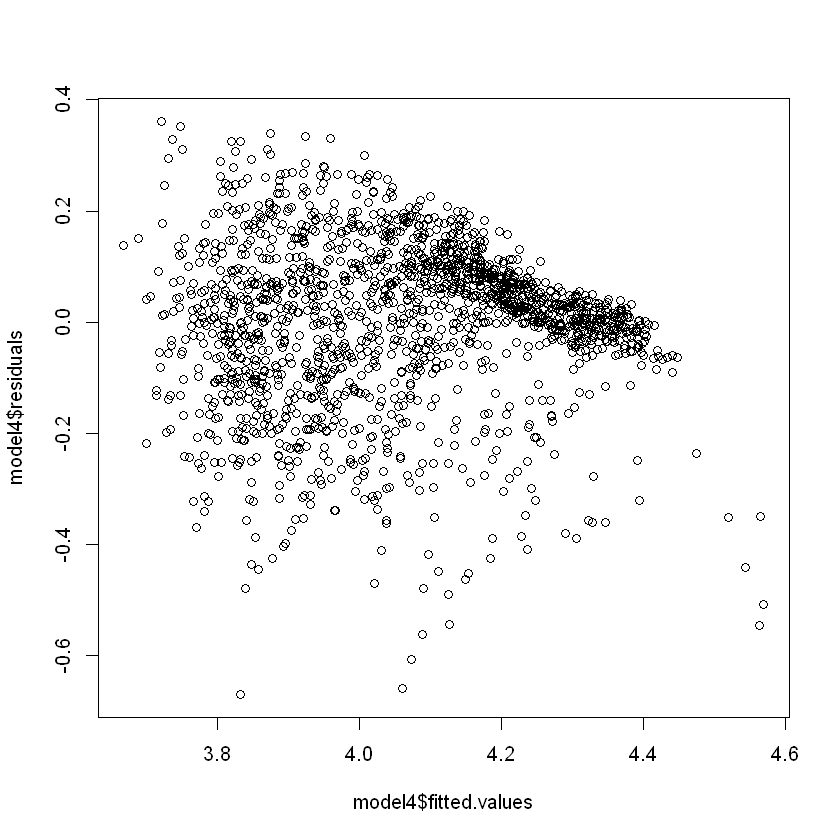

In [94]:
# same as model 3
# histogram looks fine but shapiro test says values are not normally distributed.
plot(model4$fitted.values, model4$residuals)

In [95]:
# lets move to train and test models
# 70 - 30 split

set.seed(123)
train_idx <- sample(nrow(gapminder), .70*nrow(gapminder))

gapminder_train <- gapminder[train_idx,]
gapminder_test <- gapminder[-train_idx,]

str(gapminder_train)
str(gapminder_test)

tibble [1,192 x 8] (S3: tbl_df/tbl/data.frame)
 $ country     : Factor w/ 142 levels "Afghanistan",..: 35 39 15 44 17 79 96 111 105 106 ...
 $ continent   : Factor w/ 5 levels "Africa","Americas",..: 4 1 2 4 1 3 4 1 2 1 ...
 $ year        : int [1:1192] 1982 1982 2002 1997 1962 1957 1957 1962 1972 1987 ...
 $ lifeExp     : num [1:1192] 74.6 56 71 77.1 37.8 ...
 $ pop         : int [1:1192] 5117810 45681811 179914212 5134406 4919632 7739235 3491938 3430243 2847132 562035 ...
 $ gdpPercap   : num [1:1192] 21688 3504 8131 23724 723 ...
 $ ln_lifeExp  : num [1:1192] 4.31 4.03 4.26 4.35 3.63 ...
 $ ln_gdpPercap: num [1:1192] 9.98 8.16 9 10.07 6.58 ...
tibble [512 x 8] (S3: tbl_df/tbl/data.frame)
 $ country     : Factor w/ 142 levels "Afghanistan",..: 1 1 2 2 2 2 2 3 3 3 ...
 $ continent   : Factor w/ 5 levels "Africa","Americas",..: 3 3 4 4 4 4 4 1 1 1 ...
 $ year        : int [1:512] 1962 1982 1957 1962 1992 1997 2002 1962 1977 1992 ...
 $ lifeExp     : num [1:512] 32 39.9 59.3 64.8 71.6 .

In [96]:
cand_mod1 <- lm(lifeExp ~ ln_gdpPercap, gapminder_train)
summary(cand_mod1)


Call:
lm(formula = lifeExp ~ ln_gdpPercap, data = gapminder_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.730  -4.074   1.098   4.853  19.403 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.3484     1.4928  -6.262 5.28e-10 ***
ln_gdpPercap   8.4223     0.1806  46.637  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.726 on 1190 degrees of freedom
Multiple R-squared:  0.6464,	Adjusted R-squared:  0.6461 
F-statistic:  2175 on 1 and 1190 DF,  p-value: < 2.2e-16


In [97]:
cand_mod2 <- lm(ln_lifeExp ~ ln_gdpPercap, gapminder_train)
summary(cand_mod2)


Call:
lm(formula = ln_lifeExp ~ ln_gdpPercap, data = gapminder_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66812 -0.06480  0.01949  0.09299  0.35478 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.860183   0.028249  101.25   <2e-16 ***
ln_gdpPercap 0.146780   0.003417   42.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1462 on 1190 degrees of freedom
Multiple R-squared:  0.6079,	Adjusted R-squared:  0.6075 
F-statistic:  1845 on 1 and 1190 DF,  p-value: < 2.2e-16


In [101]:
# we will assess performance score >> like PROC SCORE in SAS
# scoring the models produced by training data with test data

mod1_OOS_preds <- predict(cand_mod1, gapminder_test)
str(mod1_OOS_preds)

mod2_OOS_preds <- predict(cand_mod2, gapminder_test)
str(mod2_OOS_preds)

 Named num [1:512] 47.5 48.6 54.4 55.9 56.5 ...
 - attr(*, "names")= chr [1:512] "1" "2" "3" "4" ...
 Named num [1:512] 3.85 3.87 3.97 4 4.01 ...
 - attr(*, "names")= chr [1:512] "1" "2" "3" "4" ...


In [103]:
# look at scorings(predicted values) of 1 and 2
# in 2 values are small bcoz we are writing  down the log(life exp) as predicted values

# just to take out log from it..we will do this
mod2 <- exp(mod2_OOS_preds)
mod2[1:20]

1        2        3        4        5        6        7        8 
47.02993 47.98272 53.06654 54.44436 55.06131 57.08338 60.23379 55.23249 
       9       10       11       12       13       14       15       16 
60.80575 61.00879 55.86612 55.91457 63.85998 66.93130 66.79038 66.23940 
      17       18       19       20 
68.40148 72.82997 73.77751 75.72172

In [104]:
mod1_OOS_preds[1:20]

1        2        3        4        5        6        7        8 
47.49291 48.64377 54.42233 55.89314 56.53971 58.60918 61.69171 56.71783 
       9       10       11       12       13       14       15       16 
62.23400 62.42528 57.37235 57.42210 65.04613 67.74153 67.62059 67.14527 
      17       18       19       20 
68.98828 72.58794 73.32967 74.82220

In [106]:
# ofcourse there are changes btw model 1 and 2
# but they are close

# now we got predicted values from model
# we will compare original and predicted values side by side
# for that we will write a function
calc_performance <- function(actual, pred) {
  
  rmse <- sqrt(mean((actual - pred)**2))
  mae <- mean(abs(actual - pred))
  mape <- mean(abs((actual-pred)/actual))

    return(list(rmse = rmse, mae = mae, mape = mape))
  
}

In [108]:
compare_mod1 <- calc_performance(gapminder_test$lifeExp, mod1_OOS_preds)
compare_mod1

$rmse
[1] 7.36983

$mae
[1] 5.695895

$mape
[1] 0.1077401

In [109]:
compare_mod2 <- calc_performance(gapminder_test$lifeExp,mod2)
compare_mod2

$rmse
[1] 7.590498

$mae
[1] 5.93021

$mape
[1] 0.1098031

model 1 is better than model2
rmse-root mena square error is less
mean of diff bte obs vs pred is close to zero
mean absolute percentage error is close to zero

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

Mean Absolute Percentage Error (MAPE)

In [110]:
# so lets welcome the winner - model1 finally
final_model <- lm(lifeExp ~ ln_gdpPercap, gapminder)
summary(final_model)


Call:
lm(formula = lifeExp ~ ln_gdpPercap, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.778  -4.204   1.212   4.658  19.285 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.1009     1.2277  -7.413 1.93e-13 ***
ln_gdpPercap   8.4051     0.1488  56.500  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.62 on 1702 degrees of freedom
Multiple R-squared:  0.6522,	Adjusted R-squared:  0.652 
F-statistic:  3192 on 1 and 1702 DF,  p-value: < 2.2e-16


 This final model says Life expectancy as a linear function of the log of GDP per capita - in other words, life expectancy increases by a fixed amount (in years) for a fixed percentage change in GDP per capita. This model is consistent with diminishing marginal returns to life expectancy from increases in wealth.